In [1]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import sklearn
from sklearn.datasets import load_boston
boston = load_boston()

In [2]:
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [3]:
bos = pd.DataFrame(boston.data,columns=boston.feature_names)

In [4]:
boston.DESCR
#MEDV is our target

".. _boston_dataset:\n\nBoston house prices dataset\n---------------------------\n\n**Data Set Characteristics:**  \n\n    :Number of Instances: 506 \n\n    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.\n\n    :Attribute Information (in order):\n        - CRIM     per capita crime rate by town\n        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.\n        - INDUS    proportion of non-retail business acres per town\n        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)\n        - NOX      nitric oxides concentration (parts per 10 million)\n        - RM       average number of rooms per dwelling\n        - AGE      proportion of owner-occupied units built prior to 1940\n        - DIS      weighted distances to five Boston employment centres\n        - RAD      index of accessibility to radial highways\n        - TAX      full-value property-tax rate per $10,000

In [5]:
bos.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [6]:
bos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
dtypes: float64(13)
memory usage: 51.5 KB


In [7]:
bos.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000


In [8]:
bos.isna().sum() #missing values

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
dtype: int64

In [9]:
bos['MEDV'] = boston.target
bos

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


In [10]:
bos['MEDV']

0      24.0
1      21.6
2      34.7
3      33.4
4      36.2
       ... 
501    22.4
502    20.6
503    23.9
504    22.0
505    11.9
Name: MEDV, Length: 506, dtype: float64

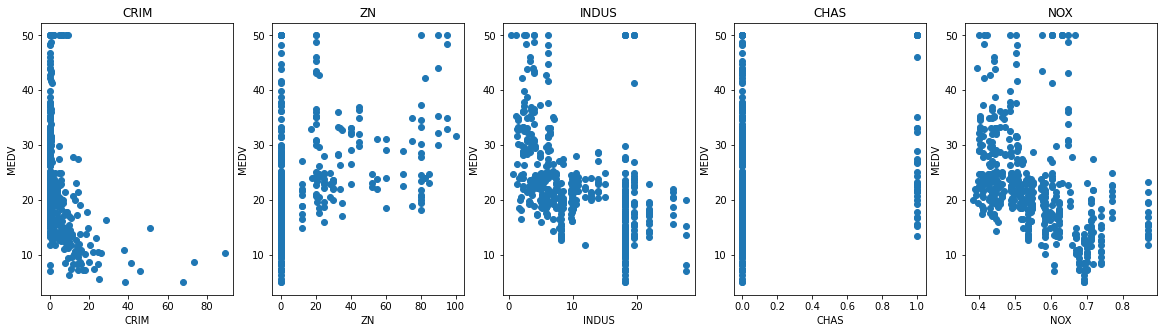

In [18]:
%matplotlib inline
plt.figure(figsize=(20, 5))
features = boston.feature_names[0:5]
target = bos['MEDV']

for i, col in enumerate(features):
    plt.subplot(1,5 , i+1)
    x = bos[col]
    y = target
    plt.scatter(x, y)
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel('MEDV')

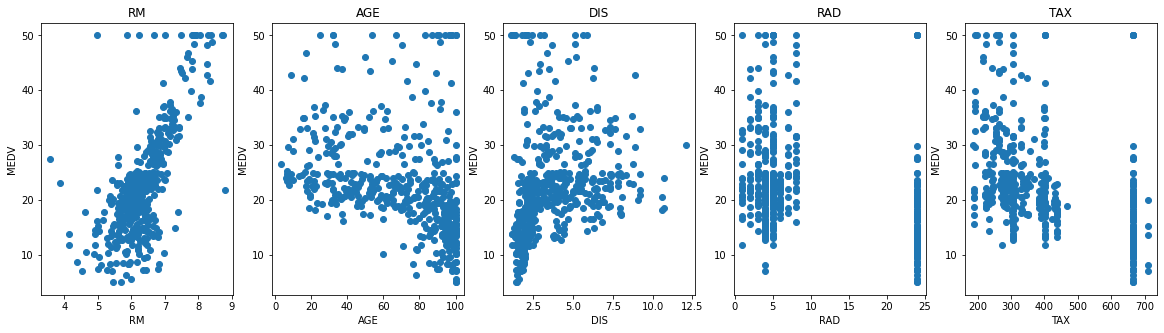

In [19]:
plt.figure(figsize=(20, 5))
features = boston.feature_names[5:10]
for i, col in enumerate(features):
    plt.subplot(1,5 , i+1)
    x = bos[col]
    y = target
    plt.scatter(x, y)
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel('MEDV')

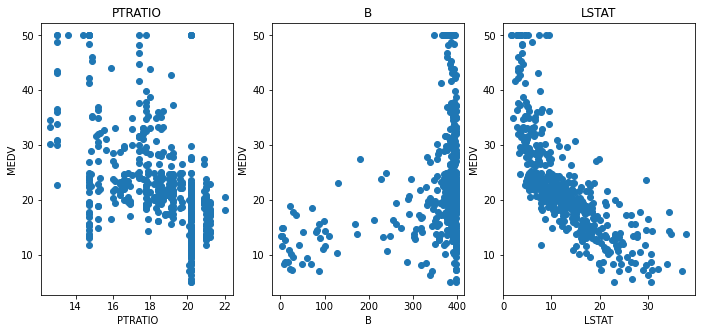

In [20]:
plt.figure(figsize=(20, 5))
features = boston.feature_names[10:]
for i, col in enumerate(features):
    plt.subplot(1,5 , i+1)
    x = bos[col]
    y = target
    plt.scatter(x, y)
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel('MEDV')

In [21]:
#LSTAT and RM are highly correlated with MEDV
#Prices increase with RM
#Prices decrease with RM

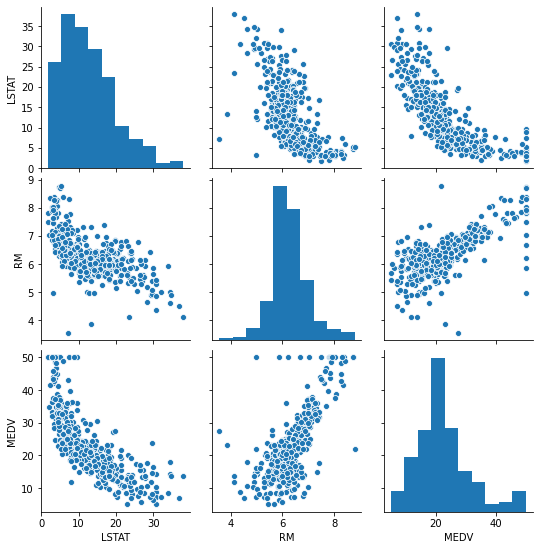

In [112]:
import seaborn as sns
data = bos[['LSTAT','RM','MEDV']]
sns.pairplot(data)

In [113]:
from sklearn.model_selection import train_test_split
X = bos[['LSTAT']]
Y = bos['MEDV']
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2, random_state=30)

In [114]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, Y_train)

LinearRegression()

In [115]:
print(model.intercept_)
print(model.coef_)

34.91076037552628
[-0.98335881]


In [116]:
X_new = pd.DataFrame({'LSTAT':[bos.LSTAT.min(),bos.LSTAT.max()]})
X_new.head()

,LSTAT
0,1.73
1,37.97


In [117]:
preds = model.predict(X_new)
preds

array([33.20954963, -2.42737378])

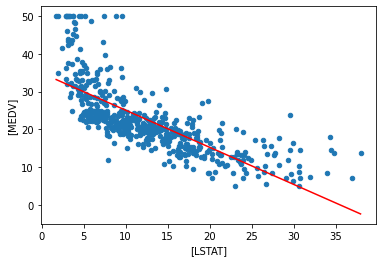

In [118]:
bos.plot(kind='scatter',x=["LSTAT"],y=["MEDV"])
plt.plot(X_new,preds,c='red')


In [119]:
X = bos[['RM']]
Y = bos['MEDV']
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2, random_state=30)

In [120]:
model = LinearRegression()
model.fit(X_train, Y_train)

LinearRegression()

In [121]:
print(model.intercept_)
print(model.coef_)

-35.16705393069161
[9.17325849]


In [122]:
X_new = pd.DataFrame({'RM':[bos.RM.min(),bos.RM.max()]})
X_new.head()

,RM
0,3.561
1,8.780


In [123]:
preds = model.predict(X_new)
preds

array([-2.50108046, 45.37415559])

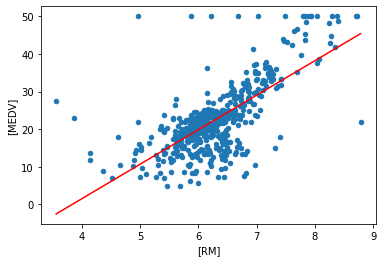

In [124]:
bos.plot(kind='scatter',x=["RM"],y=["MEDV"])
plt.plot(X_new,preds,c='red')

In [128]:
X = bos[['LSTAT','RM']]
Y = bos['MEDV']
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2, random_state=30)

In [129]:
model = LinearRegression()
model.fit(X_train, Y_train)

LinearRegression()

In [130]:
print(model.intercept_)
print(model.coef_)

-1.2316065743130515
[-0.67241695  5.12356226]


In [131]:
import statsmodels.formula.api as smf
lm = smf.ols(formula='MEDV ~ LSTAT + RM', data=bos).fit()
lm.conf_int()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.639
Model:                            OLS   Adj. R-squared:                  0.637
Method:                 Least Squares   F-statistic:                     444.3
Date:                Tue, 08 Jun 2021   Prob (F-statistic):          7.01e-112
Time:                        14:15:33   Log-Likelihood:                -1582.8
No. Observations:                 506   AIC:                             3172.
Df Residuals:                     503   BIC:                             3184.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -1.3583      3.173     -0.428      0.669      -7.592       4.875
LSTAT         -0.6424      0.044    -14.689      0.000      -0.728      -0.556
RM             5.0948      0.444     11.463      0.000       4.222       5.968
==============================================================================
Omnibus:                      145.712   Durbin-Watson:                   0.834
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              457.690
Skew:                           1.343   Prob(JB):                    4.11e-100
Kurtosis:                       6.807   Cond. No.                         202.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [151]:
model.score(X_train,Y_train)

0.6420703473557181

In [133]:
#Performing Standardisation
from sklearn.preprocessing import StandardScaler 
from sklearn.linear_model  import Ridge,Lasso,RidgeCV, LassoCV, ElasticNet, ElasticNetCV

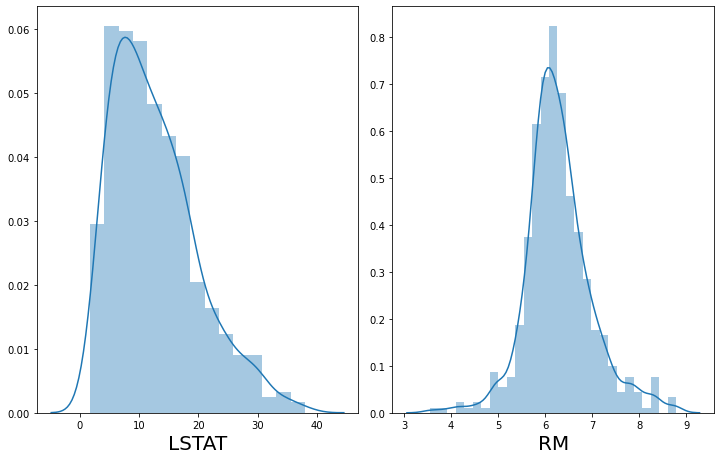

In [136]:
plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in X:
    if plotnumber<=16 :
        ax = plt.subplot(4,4,plotnumber)
        sns.distplot(X[column])
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.tight_layout()

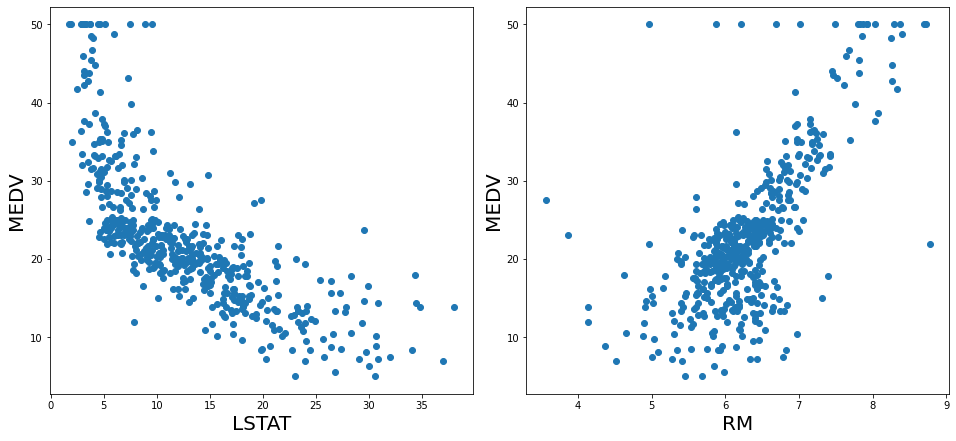

In [137]:
plt.figure(figsize=(20,30), facecolor='white')
plotnumber = 1

for column in X:
    if plotnumber<=15 :
        ax = plt.subplot(5,3,plotnumber)
        plt.scatter(X[column],y)
        plt.xlabel(column,fontsize=20)
        plt.ylabel('MEDV',fontsize=20)
    plotnumber+=1
plt.tight_layout()

In [138]:
scaler =StandardScaler()
X_scaled = scaler.fit_transform(X)

In [139]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
variables = X_scaled
vif = pd.DataFrame()
vif["VIF"] = [variance_inflation_factor(variables, i) for i in range(variables.shape[1])]

vif["Features"] = X.columns

vif

,VIF,Features
0,1.60452,LSTAT
1,1.60452,RM


In [140]:
X_train,X_test,Y_train,Y_test = train_test_split(X_scaled,Y,test_size = 0.2,random_state=30)

In [141]:
model = LinearRegression()
model.fit(X_train, Y_train)

LinearRegression()

In [142]:
model.score(X_train,Y_train)

0.6420703473557181

In [ ]:
def adj_r2(x,y):
    r2 = model.score(x,y)
    n = x.shape[0]
    p = x.shape[1]
    adjusted_r2 = 1-(1-r2)*(n-1)/(n-p-1)
    return adjusted_r2

In [144]:
adj_r2(X_train,Y_train)

0.6402851620557466

In [145]:
model.score(X_test,Y_test)

0.6145249127504527

In [146]:
adj_r2(X_test,Y_test)

0.6067375372504619

In [147]:
#LassoCV
lasscv = LassoCV(alphas = None,cv =10, max_iter = 100000, normalize = True)
lasscv.fit(X_train, Y_train)

LassoCV(cv=10, max_iter=100000, normalize=True)

In [148]:
alpha = lasscv.alpha_
alpha

0.00034847571873179874

In [149]:
lasso_reg = Lasso(alpha)
lasso_reg.fit(X_train, Y_train)

Lasso(alpha=0.00034847571873179874)

In [150]:
lasso_reg.score(X_test, Y_test)

0.6145321723918756

In [152]:
#RidgeCV
alphas = np.random.uniform(low=0, high=10, size=(50,))
ridgecv = RidgeCV(alphas = alphas,cv=10,normalize = True)
ridgecv.fit(X_train, Y_train)

RidgeCV(alphas=array([1.07046021, 7.9050577 , 9.18947295, 1.16783366, 6.94900632,
       1.29097549, 5.80670188, 6.13471733, 8.18421985, 1.73953023,
       9.30657106, 8.12870412, 8.86704997, 3.39358472, 6.24774746,
       8.13156933, 6.44069895, 1.71732959, 5.44940365, 5.02476037,
       0.54948992, 8.15177959, 9.82078309, 6.41389179, 6.81308743,
       4.60653576, 6.29993531, 9.38598422, 6.14553817, 2.07483853,
       7.69451725, 3.05061082, 7.53337896, 7.52603567, 1.97526626,
       9.43009739, 9.23286215, 4.98390834, 9.94033943, 8.42199269,
       5.05831094, 6.8708244 , 2.35167509, 2.18396122, 2.76155683,
       1.84265548, 5.44195278, 9.95903143, 6.77725114, 9.05893162]),
        cv=10, normalize=True)

In [153]:
ridgecv.alpha_

0.549489916119722

In [154]:
ridge_model = Ridge(alpha=ridgecv.alpha_)
ridge_model.fit(X_train, Y_train)

Ridge(alpha=0.549489916119722)

In [155]:
ridge_model.score(X_test, Y_test)

0.6147587063477635

In [156]:
#Elastic Net
elasticCV = ElasticNetCV(alphas = None, cv =10)
elasticCV.fit(X_train, Y_train)

ElasticNetCV(cv=10)

In [157]:
elasticCV.alpha_

0.03464579891847807

In [158]:
elasticCV.l1_ratio

0.5

In [159]:
elasticnet_reg = ElasticNet(alpha = elasticCV.alpha_,l1_ratio=0.5)
elasticnet_reg.fit(X_train, Y_train)

ElasticNet(alpha=0.03464579891847807)

In [160]:
elasticnet_reg.score(X_test, Y_test)

0.6179356407673255